In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


Matplotlib is building the font cache; this may take a moment.


In [3]:
%matplotlib inline

In [4]:
marks = pd.read_csv("Student.csv")

In [5]:
marks.head()

,Maths,Physics,Chemistry,Result
0,17,27,22,0
1,72,82,77,1
2,97,18,13,0
3,8,42,37,0
4,32,25,20,0


In [10]:
marks.describe()

,Maths,Physics,Chemistry,Result
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.842000,52.316000,52.239000,0.245000
std,29.238775,24.801114,27.397052,0.430302
min,0.000000,10.000000,5.000000,0.000000
25%,26.000000,31.000000,29.750000,0.000000
50%,51.000000,51.000000,53.000000,0.000000
75%,76.000000,74.000000,76.000000,0.000000
max,100.000000,95.000000,99.000000,1.000000


In [9]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Maths      1000 non-null   int64
 1   Physics    1000 non-null   int64
 2   Chemistry  1000 non-null   int64
 3   Result     1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [17]:
X = marks.iloc[:,:3]
y = marks['Result']
X.head()

,Maths,Physics,Chemistry
0,17,27,22
1,72,82,77
2,97,18,13
3,8,42,37
4,32,25,20


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)
print(X_train.size, X_test.size, y_train.size, y_test.size)

1950 1050 650 350


In [19]:
X_train.head()

,Maths,Physics,Chemistry
367,52,36,18
910,65,21,35
195,14,12,94
921,45,52,46
257,41,95,77


In [24]:
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import ridge_regression
model1 = LogisticRegression()
# model2 = ridge_regression()

model1.fit(X_train, y_train)
# model2.fit(X_train, y_train)

LogisticRegression()

In [26]:
output = model1.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, output)
cm

array([[245,  15],
       [ 29,  61]], dtype=int64)

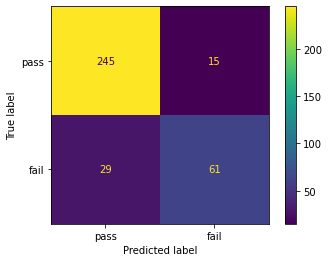

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm, display_labels=['pass','fail'])
cmd.plot()

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, output)

0.8742857142857143

for alpha =  0.2  score is  0.8714285714285714
for alpha =  0.4  score is  0.8714285714285714
for alpha =  0.6  score is  0.8714285714285714
for alpha =  0.8  score is  0.8714285714285714
for alpha =  1  score is  0.8714285714285714


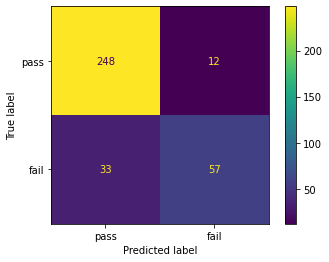

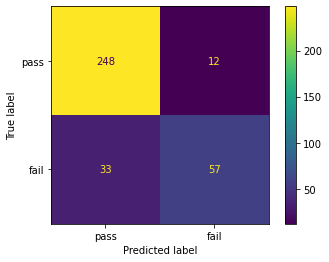

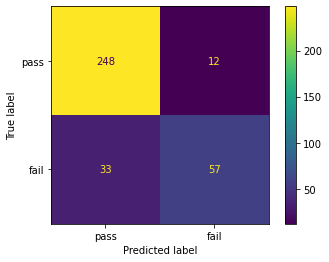

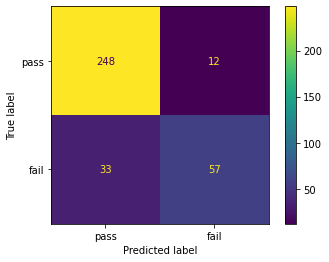

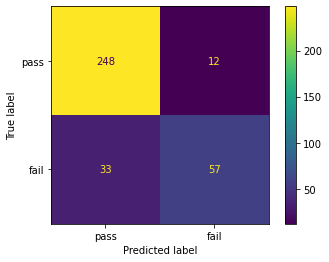

In [39]:
from sklearn.linear_model import RidgeClassifier
alpha=[0.2, 0.4, 0.6, 0.8, 1]
for a in alpha:
    rc = RidgeClassifier(alpha=a)
    rc.fit(X_train, y_train)
    y_pred = rc.predict(X_test)
    ridge_cm = confusion_matrix(y_test, y_pred)
    ridge_as = accuracy_score(y_test, y_pred)
    
    
    cmd_rc = ConfusionMatrixDisplay(ridge_cm, display_labels=['pass','fail'])
    print("for alpha = ", a, " score is ", ridge_as)
    cmd_rc.plot()